# Kickstarter projects - What makes them successful?
#### Vivian Yip, Maheen Nawabi, Catherine Bi

***
## Table of Contents
1. **Introduction**
2. **Preliminaries**
3. **Data**
<br> 3.1 Data Source
<br> 3.2 About the Data
<br> 3.3 Data Cleaning
4. **Visualizations**
<br> 4.1 Categories of Projects
<br> 4.2 Share of Successful Projects for Different Variables 
<br> 4.3 Time Trends
5. **Prediction of Success**
<br> 5.1 Logistic Regression
<br> 5.2 Random Forests
<br> 5.3 K-Nearest Neighbors
6. **Conclusion**



***************
## 1. Introduction
Crowdfunding is the practice of funding a project or venture by raising small amounts of money from many people. The majority of crowdfunding today happens via online platforms, and one of the most popular ones is Kickstarter. It maintains a global crowdfunding platform focused on creative projects, and project categories include art, music, video games, food and technology. The primary steps to start a Kickstarter project are: start a campaign, set the minimum funding goal and choose a deadline. If the project does not meet its minimum funding goal by the deadline, the project will not receive any funds and be considered as failed.

We analyze a dataset of Kickstarter projects by graphing useful visualizations to determine factors and trends of successful projects. We then employ machine learning models to ultimately predict whether a project will succeed on Kickstarter at the time of launch.

***
## 2. Preliminaries

Prior to cleaning and analyzing our data as well as creating visualizations and we import pakages that we will use.

In [1]:
import sys                             # system module 
import pandas as pd                    # data package
import matplotlib as mpl  
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for pandas 
import seaborn as sns

%matplotlib inline                     

# check versions 
print('Python version: ', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())

Python version:  3.6.3 |Anaconda custom (64-bit)| (default, Oct  6 2017, 12:04:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas version:  0.20.3
Today:  2018-05-04


***
## 3. Data

### 3.1 Data Source

The dataset that we will use for this project is publicly available and can be downloaded on [Kaggle](https://www.kaggle.com/kemical/kickstarter-projects/data).

In [2]:
path= '/Users/LuisCaceres/Downloads/kickstarter-projects/ks-projects-201801.csv'
ks=pd.read_csv(path)

### 3.2 About the Data
The dataset consists of 378,661 rows (one row per kickstarter projects) and 15 columns (variables).


In [3]:
ks.shape

(378661, 15)

 These variables provide information onthe following:
 * ID, which is the ID number of a project
 * name, which is the name of the project
 * category, which is the sub-category the project falls into
 * main_category, which is the main category the project falls into 
 * currency, which is the currency in which money is raised 
 * deadline, which is the end date of the money raising period
 * goal, which is the monetary goal set for the project
 * launched, which is the date at which the project is launched
 * pledged, which is the money raised in chosen currency
 * state, which indicates if a project is a 'successful', 'failed', 'canceled', 
 * backers, which is the number of people that have contributed mones
 * country, which is the country in which the project is launched
 * usd pledged, which is the amount of money raised in nominal USD
 * usd_pledged_real, which is the amount of money raised in real USD
 * usd_goal_real, which is the monetary goal set at launch of the project in real USD

In [4]:
list(ks.columns)

['ID',
 'name',
 'category',
 'main_category',
 'currency',
 'deadline',
 'goal',
 'launched',
 'pledged',
 'state',
 'backers',
 'country',
 'usd pledged',
 'usd_pledged_real',
 'usd_goal_real']

#### 3.2.1 Main Categories and Categories of projects

Each project falls into one of 15 main categories.

In [5]:
print(ks['main_category'].unique())
len(ks['main_category'].unique())

['Publishing' 'Film & Video' 'Music' 'Food' 'Design' 'Crafts' 'Games'
 'Comics' 'Fashion' 'Theater' 'Art' 'Photography' 'Technology' 'Dance'
 'Journalism']


15

Within each category, there are sub-categories. In total, there are 159 sub-categories.

In [6]:
len(ks['category'].unique())

159

#### 3.2.2 State of Projects

If a project reaches its goal, it is considered 'successulf'. On the other hand, it is labeled as 'failed' if the money raised falls short of the monetary goal. Projects can also be 'canceled', 'suspended' or 'undefined'. Since our goal is to define what makes projects successful, we will later clean our DataFrame as to only include 'successful' and 'failed' projects.

In [7]:
ks['state'].unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined', 'suspended'], dtype=object)

### 3.3 Data Cleaning

Several changes need to be made to the dataset, before it can be used to run analyses. We will remove obavious errors from the DataFrame, add new variables and will create a new subset of the dataset.

#### 3.3.1 Removing Errors

First, we remove the projects that were launched in 1970 as they are obviously errors.

In [8]:
ks['year']=(ks['launched'].astype(str).str[0:4]).astype(int) #create a new variable of the year of the project was launched
ks = ks.loc[ks['year']!=1970,:] #dropping projects launched in 1970
ks['year'].value_counts() #number of projects launched in each year

2015    77300
2014    67745
2016    57184
2017    52200
2013    44851
2012    41165
2011    26237
2010    10519
2009     1329
2018      124
Name: year, dtype: int64

#### 3.3.2 Adding New Variables

We create a new variable, which is the duration of the money raising period. The duration is calculated as the difference in days between the deadline and launch date.

In [9]:
ks['launched']=ks['launched'].str[0:10]	#removing the hhmmss timestamp	
ks['deadline']=pd.to_datetime(ks['deadline']) #converting deadline to datetime
ks['launched']=pd.to_datetime(ks['launched']) #converting deadline to datetime	
ks['duration'] = (ks['deadline'] - ks['launched']).astype(str) #getting the duration by deadline - launched
ks['duration']= ks['duration'].str[0:-24] #extracting the number of days from duration
ks['duration']=ks['duration'].astype(int) #converting number of days to integer type

We create another new variable “Success Rate”, defined as the ratio of the monetary goal and the money raised, for every project.

In [10]:
ks['success_rate'] = ks['usd_pledged_real']/ks['usd_goal_real'] #create a new variable ‘success rate’

#### 3.3.3 Creating a New Subset of DataFrame

As we are interested in analyzing what makes projects successful, we will focus on successful and failed projects only. For this reason, we create a subset of our dataframe that only includes projects of these two states. This subset is approximately 87.6% of the original dataset.

In [11]:
ks1=ks.loc[(ks['state']=='successful') |
          (ks['state']=='failed'), :]
len(ks1)/len(ks)

0.8759315892609084

In [12]:
ks1['success']=0
ks1.loc[ks1['state']=='successful','success']=1
ks1['success'].value_counts()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0    197719
1    133956
Name: success, dtype: int64

***
## 4. Visualizations

### 4.1 Categories of projects

We begin by looking at the distribution of total projects by the 15 main categories as mentioned above (3.2.1)

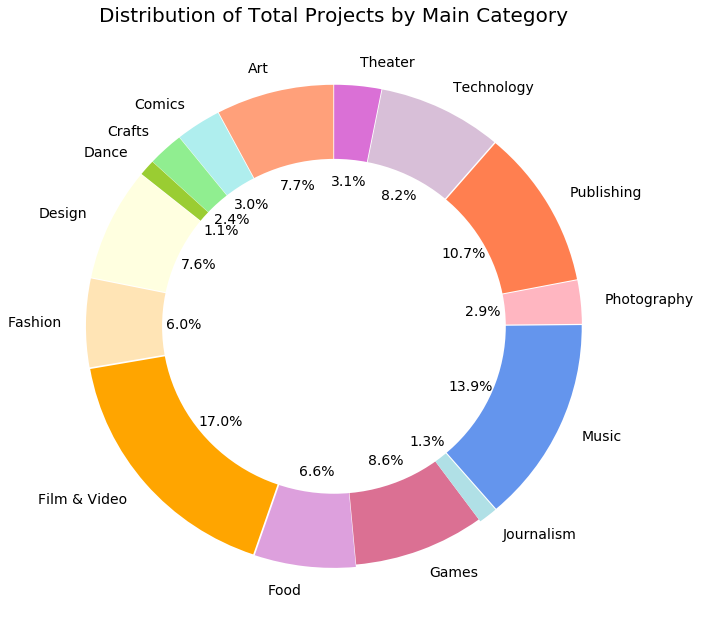

In [28]:
N= ks1.shape[0]
ks1['total']= 1
sums= ks1.groupby(['main_category']).sum()
sums['frac'] =  sums['total']*100/N

from pylab import *
figure1,ax1= plt.subplots(1, figsize=(11,11))


# The slices will be ordered and plotted counter-clockwise.
labels = sums.index.tolist()
fracs = sums['frac']

colors = ['lightsalmon','paleturquoise','lightgreen','yellowgreen','lightyellow','moccasin','orange','plum','palevioletred','powderblue','cornflowerblue','lightpink','coral','thistle','orchid']
explode = (0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.0,0.01,0.01,0.01,0.01,0.01,0.01,)

ax1.pie(fracs,colors=colors, labels=labels,explode=explode,wedgeprops = {'linewidth':3},textprops= {'fontsize':14},
                autopct='%1.1f%%', shadow=False, startangle=90)

ax1.set_title('Distribution of Total Projects by Main Category', fontsize=20)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()


# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

From this pie chart, we note that Film & Video, Music, Publishing and followed by Games are the most popular categories.

### 4.2 Share of Successful Projects for Different Variables

With the aim to identify what factors potentially determine the success of a project, we will plot the 'Share of Successful Prejects' for different variables. By 'Share of Successful Projects', we mean the the proportion of projects that are successful. We create the following plots:
* Plotting the 'Share of Successfu Projects' for **categories** will help us identify in what category projects are more successful
* Plotting the 'Share of Successfu Projects' for different ranges of **funding goals** will help us confirm if setting a lower goal makes it easier to be successful
* Plotting the 'Share of Successfu Projects' against the **duration of the money raising period** will show us if longer or shorter durations are related to success
* Plotting the 'Share of Successfu Projects' against the **money raised** will show us if there is any relationship between mones raised and success


But before plotting those graphs, we will **transform the goals into 5-percentile ranges**. We do so because plotting the Share of Success for bins of goals will provide a ^graph that is much easier to read. The reason for this is, that the range of goal is very large, but that majority of the projects are concentrated in the lower range of the variable goal.

In [13]:
ks1['goal']=ks1['goal'].astype(int)
ks1['usd_goal_real']=ks1['usd_goal_real'].astype(int)

# create a list of percentile values for 5th,10th,15th, ..., percentiles
fivepercentiles=[np.percentile(ks1['usd_goal_real'],i) for i in range(0,101,5)] 

# create a new variable that indicates the percentile of goal
ks1['percentile']=0
for i in range(20,0,-1):
    ks1.loc[ks1['usd_goal_real']<fivepercentiles[i],'percentile']=i*5
    
# create a new variable that indicates range of goal as a string (according to percentiles)  
ranges=[fivepercentiles[i:i+2] for i in range(0,20)]
ranges=[str(i) for i in ranges]
ranges=[i.replace(',',' -') for i in [i.replace(']','')for i in [i.replace('[','') for i in ranges]]]
ks1['range']=0
for i in range(0,20):
    ks1.loc[ks1['percentile']==(i+1)*5,'range']=ranges[i]   

ks1=ks1.loc[ks1['range']!=0,:]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

With this new variable, we can now create bar charts for the categories and the 5-Percentile-Goal-Ranges:

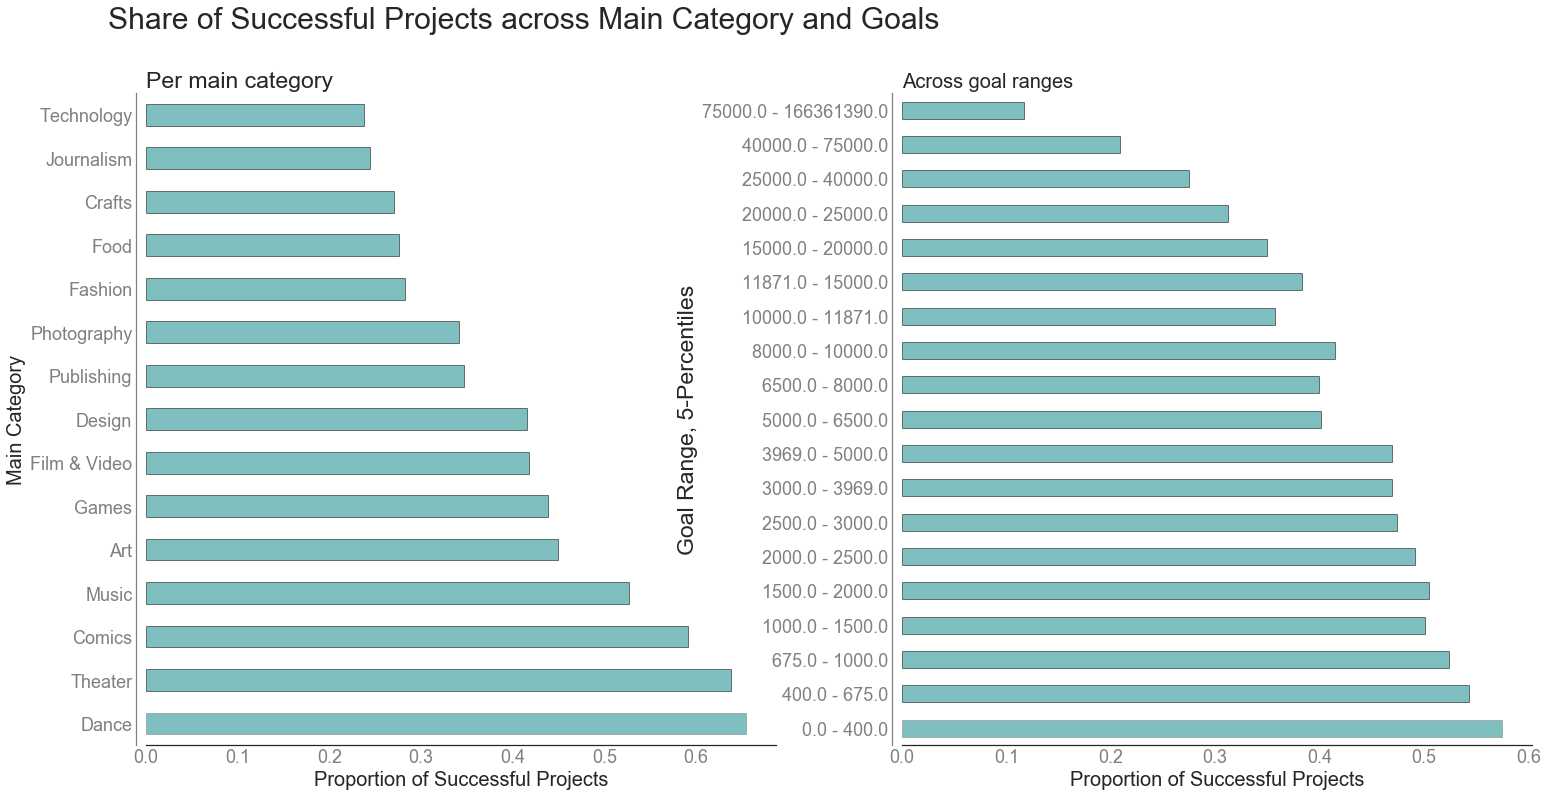

In [14]:
a = ks1.set_index(['main_category']) 
a = ks1.groupby(['main_category']).mean()

b = ks1.set_index(['range']) 
b = ks1.groupby(['range']).mean()

plt.style.use('seaborn-white')

fig, axes = plt.subplots(figsize=(14,12),nrows=1,ncols=2)

a.sort_values(by=['success'],ascending=False)['success'].plot(ax=axes[0], kind='barh', edgecolor= 'grey', color='teal', alpha=0.5)
axes[0].set_title('Per main category', fontsize=23, loc='left')
axes[0].set_ylabel('Main Category', fontsize=20)
axes[0].set_xlabel('Proportion of Successful Projects', fontsize=20)
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['left'].set_position(('outward',10))
axes[0].tick_params(labelsize=18, colors='grey')
axes[0].spines['left'].set_edgecolor('grey')

b.sort_values(by=['percentile'])['success'].plot(ax=axes[1], kind='barh',edgecolor= 'grey', color='teal', alpha=0.5)
axes[1].set_title('Across goal ranges', fontsize=20, loc='left')
axes[1].set_ylabel('Goal Range, 5-Percentiles', fontsize=23)
axes[1].set_xlabel('Proportion of Successful Projects', fontsize=20)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['left'].set_position(('outward',10))
axes[1].spines['left'].set_edgecolor('grey')

axes[1].tick_params(labelsize=18, colors='grey')

fig.suptitle('Share of Successful Projects across Main Category and Goals', fontsize=30)
fig.subplots_adjust(right=1.5)

From these two graphs we can draw the following conclusions:
1. Creative categories seem to be the most successful ones: Dance, Theater, Comics, Music and Art are the top five categories
2. In lower goal ranges, more projects are succcessful. The higher the goal, the less likely is a project successful.

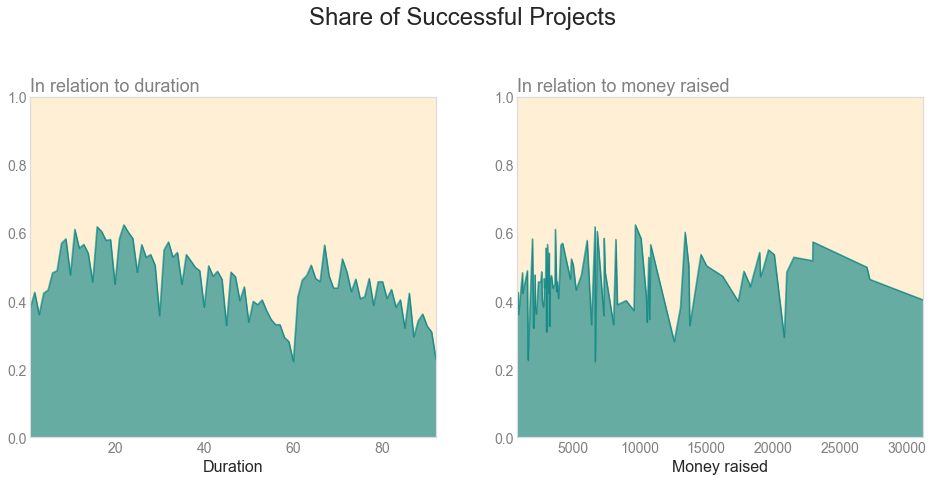

In [15]:
c = ks1.set_index(['duration']) 
c = c.groupby(['duration']).mean()

d = ks1.set_index(['usd_pledged_real']) 
d = c.groupby(['usd_pledged_real']).mean()

plt.style.use('seaborn-white')

fig, axes = plt.subplots(figsize=(16,7),nrows=1,ncols=2)

c['success'].plot(ax=axes[0], kind='area', color='teal', alpha=0.6)
axes[0].set_title('In relation to duration',fontsize=18, loc='left',color='grey')
axes[0].set_xlabel('Duration', fontsize=16)
axes[0].set_ylim(0,1)
axes[0].tick_params(labelsize=14, colors='grey')
axes[0].spines['left'].set_edgecolor('gainsboro')
axes[0].spines['right'].set_edgecolor('gainsboro')
axes[0].spines['bottom'].set_edgecolor('gainsboro')
axes[0].spines['top'].set_edgecolor('gainsboro')
axes[0].set_facecolor('papayawhip')


d['success'].plot(ax=axes[1], kind='area', color='teal', alpha=0.6)
axes[1].set_title('In relation to money raised',fontsize=18,loc='left', color='grey')
axes[1].set_xlabel('Money raised', fontsize=16)
axes[1].set_ylim(0,1)
axes[1].spines['left'].set_edgecolor('gainsboro')
axes[1].spines['right'].set_edgecolor('gainsboro')
axes[1].spines['bottom'].set_edgecolor('gainsboro')
axes[1].spines['top'].set_edgecolor('gainsboro')
axes[1].tick_params(labelsize=14, colors='grey')
axes[1].set_facecolor('papayawhip')


fig.suptitle('Share of Successful Projects', fontsize=24)
fig.subplots_adjust(top=0.8)

From these two graphs, we can conclude:
1. The share of successful projects is not obviously related to the duration of the money raising period. It appears, that projects with a duration of around 15-30 days, on average are more successful
2. There is no relationship between the amount of money raised and success

In [16]:
import matplotlib.patches as mpatches

e= ks1.groupby(['main_category']).mean()
f= ks1.groupby(['country']).mean()
f= f.drop(f.index[16])
plt.style.use('seaborn')

xe=e['usd_goal_real']
ye= e['success']
size_e=e['usd_pledged_real']/1

xf=f['usd_goal_real']
yf= f['success']
size_f=f['usd_pledged_real']/2.5


e['colors']=['red','blue','green','yellowgreen','yellow','deepskyblue','orange','purple','pink','aqua','maroon','cadetblue','lime','magenta','aquamarine']
f['colors']=['red','blue','green','yellowgreen','yellow','deepskyblue','orange','purple','pink','aqua','maroon','cadetblue','lime','magenta','aquamarine','chartreuse','plum','indianred','teal','indigo','chocolate','blueviolet']

# Creating labels for each color
a_patch = mpatches.Patch(color='red', label='Art')
b_patch = mpatches.Patch(color='blue', label='Comics ')
c_patch = mpatches.Patch(color='green', label='Crafts')
d_patch = mpatches.Patch(color='yellowgreen', label='Dance')
e_patch = mpatches.Patch(color='yellow', label='Design') 
f_patch = mpatches.Patch(color='deepskyblue', label='Fashion')
g_patch = mpatches.Patch(color='orange', label=' Film & Video') 
h_patch = mpatches.Patch(color='purple', label='Food')
i_patch = mpatches.Patch(color='pink', label='Games')
j_patch = mpatches.Patch(color='aqua', label='Journalism')
k_patch = mpatches.Patch(color='maroon', label='Music')
l_patch = mpatches.Patch(color='cadetblue', label='Photography')
m_patch = mpatches.Patch(color='lime', label='Publishing')
n_patch = mpatches.Patch(color ='magenta', label='Technology')
o_patch = mpatches.Patch(color='aquamarine', label='Theater')

a1_patch = mpatches.Patch(color='red', label='AT') 
b1_patch = mpatches.Patch(color='blue', label='AU') 
c1_patch = mpatches.Patch(color='green', label='BE')
d1_patch = mpatches.Patch(color='yellowgreen', label='CA')
e1_patch = mpatches.Patch(color='yellow', label='CH')
f1_patch = mpatches.Patch(color='deepskyblue', label='DE')
g1_patch = mpatches.Patch(color='orange', label='DK')
h1_patch = mpatches.Patch(color='purple', label='ES')
i1_patch = mpatches.Patch(color='pink', label='FR')
j1_patch = mpatches.Patch(color='aqua', label='GB')
k1_patch = mpatches.Patch(color='maroon', label='HK')
l1_patch = mpatches.Patch(color='cadetblue', label='IE')
m1_patch = mpatches.Patch(color='lime', label='IT')
n1_patch = mpatches.Patch(color='magenta', label='JP')
o1_patch = mpatches.Patch(color='aquamarine', label='LU')
p1_patch = mpatches.Patch(color='chartreuse', label='MX')
r1_patch = mpatches.Patch(color='plum', label='NL')
s1_patch = mpatches.Patch(color='indianred', label='NO')
t1_patch = mpatches.Patch(color='teal', label='NZ')
u1_patch = mpatches.Patch(color='indigo', label='SE')
v1_patch = mpatches.Patch(color='chocolate', label='SG')
w1_patch = mpatches.Patch(color='blueviolet', label='US')

Text(0.5,0.98,'Average Proportion of Success, Average Goal, & Average Money Raised')

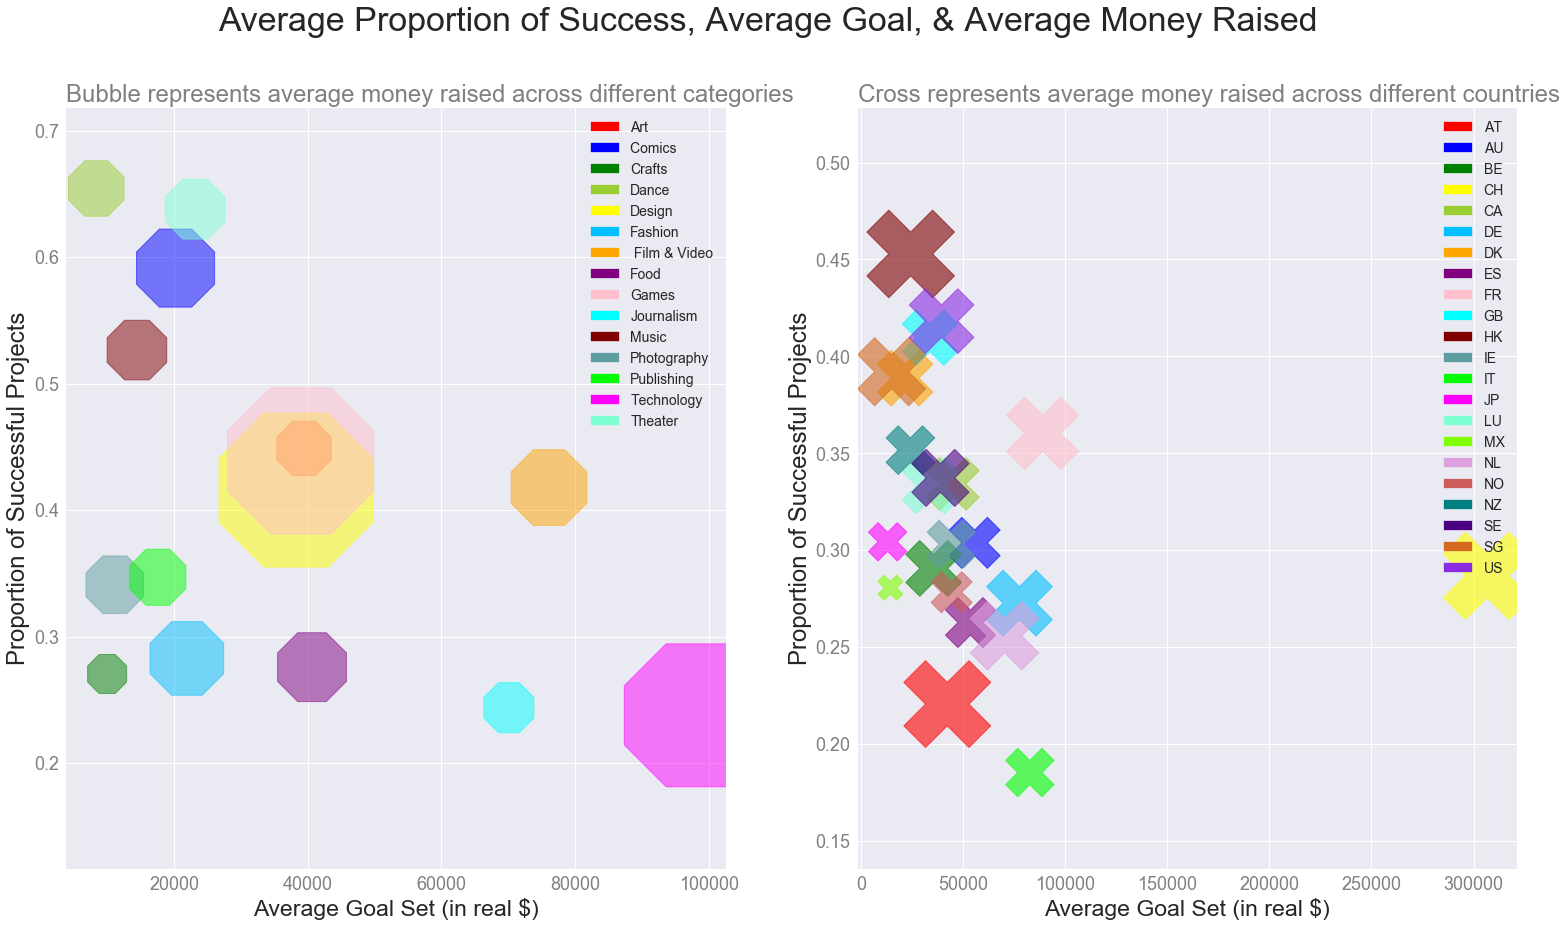

In [17]:
fig, ax = plt.subplots(figsize=(26,14), nrows=1, ncols=2)

# Plot 1: Across Different Categories
ax[0].scatter(xe,ye,s=size_e,color=e['colors'], marker='8' ,edgecolor=e['colors'], alpha=0.5, linewidth=1)
ax[0].set_title('Bubble represents average money raised across different categories', fontsize=24, loc='left', color='grey')
ax[0].set_xlabel('Average Goal Set (in real $)', fontsize=23)
ax[0].set_ylabel('Proportion of Successful Projects', fontsize=24)
ax[0].tick_params(labelsize=18, colors='grey')
ax[0].spines['right'].set_visible(False)
ax[0].legend(handles=[a_patch, b_patch, c_patch, d_patch, e_patch, f_patch, g_patch, h_patch, i_patch, j_patch, k_patch, l_patch, m_patch, n_patch, o_patch], fontsize=14, loc=1)

#Plot 2: Across Different Countries
ax[1].scatter(xf,yf,s=size_f,color=f['colors'], marker='X' ,edgecolor=f['colors'], alpha=0.6, linewidth=1,label=f.index)
ax[1].set_title('Cross represents average money raised across different countries', fontsize=24, loc='left', color='grey')
ax[1].set_xlabel('Average Goal Set (in real $)', fontsize=23)
ax[1].set_ylabel('Proportion of Successful Projects', fontsize=24)
ax[1].tick_params(labelsize=18, colors='grey')
ax[1].spines['right'].set_visible(False)
ax[1].legend(handles=[a1_patch,b1_patch,c1_patch,e1_patch, d1_patch,f1_patch,g1_patch,h1_patch,i1_patch,j1_patch,k1_patch,l1_patch,m1_patch,n1_patch,o1_patch,p1_patch,r1_patch,s1_patch,t1_patch,u1_patch,v1_patch,w1_patch],fontsize=14,loc=1)

fig.suptitle('Average Proportion of Success, Average Goal, & Average Money Raised', fontsize=34)


The above graphs help us visualize our data in **four** dimensions:

**Graph 1:** 
<br>Each bubble represents a different main category.
The graph shows a scatter plot of proportion of successful projects for each main category against the average goal set for that specific category.
The size of the bubble represents the average money raised for a specific category: the larger the size of bubble, the more money a project category raised on average. 


From the first graph, we can make the *following* conclusions:
<br>There is a higher concentration of points around average goals of less than USD 20,000. Projects within the ‘Dance’ category, usually, set low goals, but are the most successful, followed by ‘Comics’ and ‘Theater’.It could mean that if you belong to these categories and set a goal lower than $20,000, you have more than 50% chance of success. 

Projects in the ‘Crafts’ category despite setting lower goals raise the least amount of money and are the least successful. Projects in ‘Journalism’ set unusually high goals, are not able to secure sufficient funds and have a lower shot at success. This result might indicate a lower interest from audience in these categories. 

Project in the ‘Design’ and ‘Games’ category, on average, set moderately higher goals but raise the most amount of funds- almost 40% of the projects in this category are successful. Hence, if a project is in either of these categories, the chances of securing funding are good. ‘Art’ projects, despite having larger goals, are able to be successful.  

‘Technology’ related projects set the highest goals, raise a lot of money but still have a lower rate of success- This observation is intuitive as generally, executing a technical project requires large capital and even if such projects are popular and attract higher funding, it still might be the case that the funding is insufficient to launch the project. 




**Graph 2:**
<br>Each cross represents a country.
The graph shows a scatterplot of proportion of successful projects against the average goal for projects set for that country.
The cross size represents the average amount of money raised for projects in a specific country; the larger the size of cross, the more money project raised on average in that country

Based on the plot, we can draw the following conclusions:
<br>In most of the countries, on average, people set goals lower than $50,000.
<br>In Hongkong, projects have the highest success rate; they set lower goals but manage to raise highest amount of funds in absolute terms.
<br>In China, people set extremely high goals but manage to secure high funding and are moderately successful.
<br>In Austria, people set high goals, raise significant money but only 20% of the projects are successful which indicates that if people revise their goals, they might be more successful. Italy is another country where projects set unusually high goals and fail. However, they also raise less money in contrast to Austria. 

On average, countries where average goals are set lower than $30,000, chance of success is more than 30%. However, as higher goals are set, the probability goes down. 

Hongkong, US, UK, Singapore, and France are the countries that seem most successful in both raising money and succeeding. It could mean that, generally, if you’re launching a project in either of these countries, despite your goal target, your project has a better chance at raising funds and being successful. 



### 4.3 Time Trends

Analyzing the Share of Successes for different variables already gave us some valuable insights into factors of success.
<br> We will now analyze time trends, in order to understand if there are any trends in successful projects over time.
We first look at the mean values of variables of interest over time, namely the **duration** of project (in days), amount of **goal** set, **proportion of goal met** and **proportion of successful projects**.

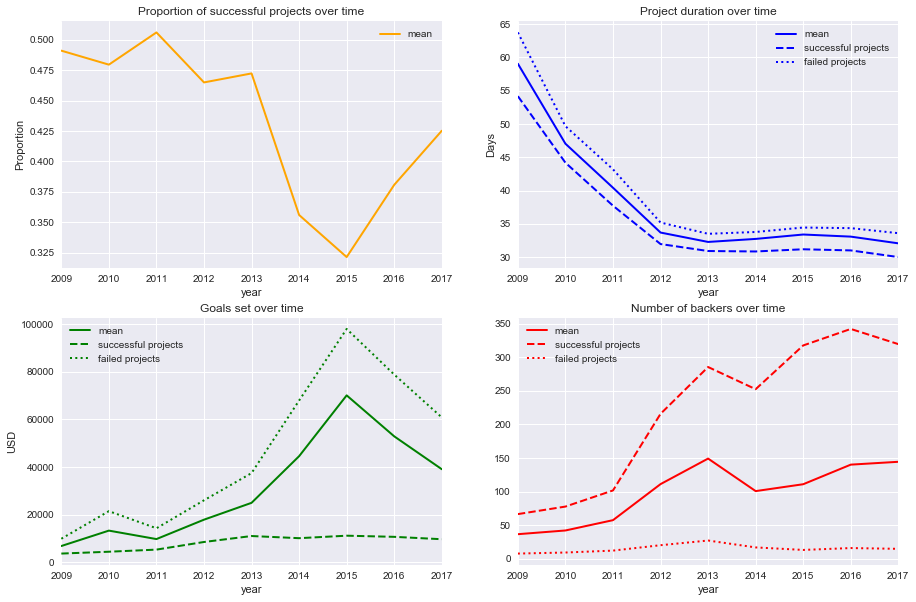

In [18]:
g=ks1.set_index(['year'])  #setting the index as year
g=ks1.groupby(['year']).mean() #creating new dataframe of means

h=ks.loc[ks['state']=='successful', :]
h=h.set_index(['year'])
h=h.groupby(['year']).mean()

i=ks.loc[ks['state']=='failed', :]
i=i.set_index(['year'])
i=i.groupby(['year']).mean()

fig, axes = plt.subplots(figsize=(15,10),nrows=2,ncols=2)

g['success'].plot(ax=axes[0,0],lw=2,color='orange', label='mean')
axes[0,0].set_title('Proportion of successful projects over time')
axes[0,0].set_ylabel('Proportion')
axes[0,0].legend()

g['duration'].plot(ax=axes[0,1],lw=2, color='blue',label='mean')
h['duration'].plot(ax=axes[0,1],lw=2, color='blue',linestyle='--',label='successful projects') 
i['duration'].plot(ax=axes[0,1],lw=2, color='blue',linestyle=':',label='failed projects')
axes[0,1].set_title('Project duration over time')
axes[0,1].set_ylabel('Days')
axes[0,1].legend()

g['usd_goal_real'].plot(ax=axes[1,0],lw=2,color='green', label='mean')
h['usd_goal_real'].plot(ax=axes[1,0],lw=2,color='green', linestyle='--',label='successful projects')
i['usd_goal_real'].plot(ax=axes[1,0],lw=2,color='green', linestyle=':', label='failed projects')
axes[1,0].set_title('Goals set over time')
axes[1,0].set_ylabel('USD')
axes[1,0].legend()

g['backers'].plot(ax=axes[1,1],lw=2,color='red', label='mean')
h['backers'].plot(ax=axes[1,1],lw=2,color='red', linestyle='--',label='successful projects')
i['backers'].plot(ax=axes[1,1],lw=2,color='red', linestyle=':', label='failed projects')
axes[1,1].set_title('Number of backers over time')
axes[1,1].legend()

In [19]:
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

We observe that:
1. Average project durations have decreased significantly from 59 days in 2009 to 33 days in 2012 and remained there after.
2. The average goal set increased over time and reached a peak of around 10,000 USD in 2015. This increase stems form failed projects.
3. Successful projects have consistently set rather low goals in comparison to failed projects
4. The mean number of backers has generally been increasing over the years, except a dip for some reason in 2014
5. Successful project have always had more backers than failed projects, this trend has been increasing.

Now let’s take a closer look at how the distribution of categories change over time.


Text(0.5,1,'Number of projects by category over time')

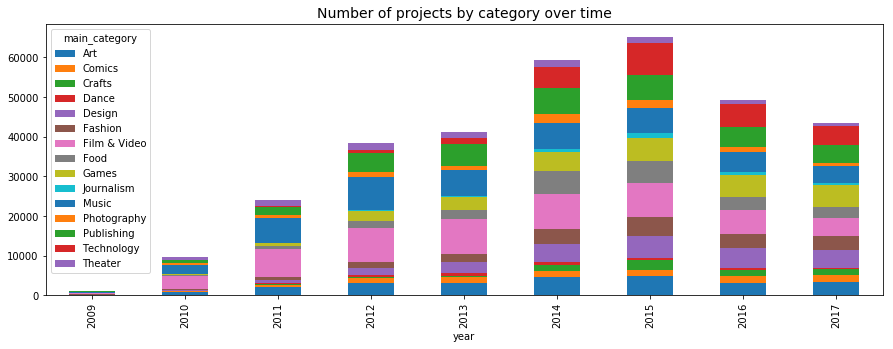

In [20]:
ks3=ks1.groupby(['year','main_category']).mean()	#creating a new dataframe with category as the 2nd index

fig, ax = plt.subplots(figsize=(15,5))
ks1.groupby(['year','main_category']).count()['success'].unstack().plot(ax=ax, kind='bar',stacked=True)
ax.set_title('Number of projects by category over time', fontsize=14)

Some of the prominent observations are as below. 
1. Years 2014 and 2015 have seen a good surge in the number of projects on Kickstarter
2. For some reason there has been a steep decline in 2016 from 2015.
3. A handful of categories have gained popularity over the years - the number of projects in Technology, Games, Design and Fashion has steadily increased. 

Next, we breakdown only the successful projects into their different categories. In order to plot this, we will need to create a pivot table.

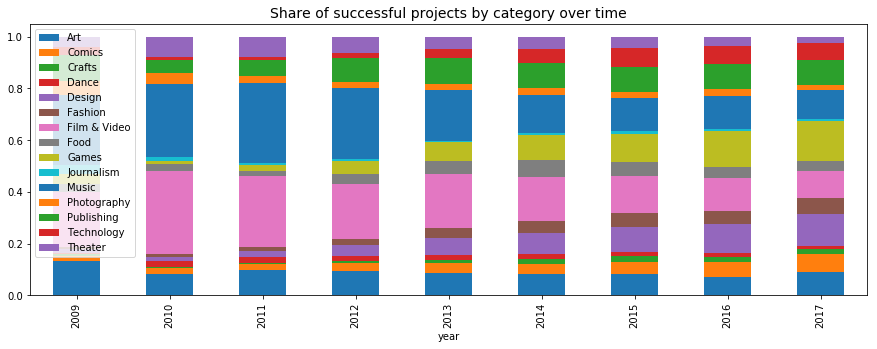

In [21]:
#creating a pivot table
maincat=ks1.loc[ks1['success']==1,:][['year','main_category']]
ks_piv=maincat.pivot_table(index='year',columns='main_category',aggfunc=len,margins=True)
ks_piv
#creating a pivot table of percentage/proportion
ks_piv2=ks_piv.div(ks_piv.iloc[:,-1],axis=0)
ks_piv2=ks_piv2.drop('All',axis=1)
ks_piv2=ks_piv2.drop('All',axis=0)
ks_piv2
fig, ax = plt.subplots(figsize=(15,5))
ks_piv2.plot(ax=ax,kind='bar',stacked=True)
ax.set_title('Share of successful projects by category over time', fontsize=14)
ax.legend(loc=2)

Again we see that Technology, Games, Design and Fashion projects are increasingly successful in raising funds over years. On the other hand, the shares of successful projects belonging to Film & Video and Music projects see a decline.

***
## 5. Prediction of Success

To predict the success of a Kickstarter project, we will run three different machine learning models, namely Logistic Regression, Random Forest and K-Nearest Neighbours, on the data and pick the most accurate one. The target variable is the binary variable 'success', while the predictor variables are the goal, duration, main category and country of a project.

The process for each model goes like this:
<br>Step 1: We first split the data into 80/20 training and testing sets.
<br>Step 2: Fit the model to the training data, make predictions based on this data and test the predictions on the test data. 
<br>Step 3: Perform 5-fold cross-validation and calculate the mean score.

In [24]:
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression as logit
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Step 1
y,X = dmatrices('success ~ usd_goal_real + duration+ main_category+country',data=ks1,return_type='dataframe')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(265339, 39) (265339, 1)
(66335, 39) (66335, 1)


### 5.1 Logistic Regression

In [25]:
# Step 2
lm = logit().fit(X_train, y_train)
predictionslm = lm.predict(X_test)
print ('Logistic model score:', lm.score(X_test, y_test))
# Step 3
print ('Mean logistic regression cross-validated scores:', cross_val_score(lm, X, y, cv=5).mean())

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic model score: 0.595703625537


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Mean logistic regression cross-validated scores: 0.596121492794


### 5.2 Random Forest

In [26]:
# Step 2
forest = rf().fit(X_train, y_train)
predictionsforest = forest.predict(X_test)
print ('Random Forest score:', forest.score(X_test, y_test))
# Step 3
print ('Mean Random Forest cross-validated scores:', cross_val_score(forest, X, y, cv=5).mean())

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest score: 0.00147143522705


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 

Mean Random Forest cross-validated scores: 0.00127717778295


### 5.3 K-Nearest Neighbours

In [27]:
# Step 2
knear = knn().fit(X_train, y_train)
predictionsknear = knear.predict(X_test)
print ('KNN score:', knear.score(X_test, y_test))
# Step 3
print ('Mean KNN cross-validated scores:', cross_val_score(knear, X, y, cv=5).mean())

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNN score: 0.61047712369


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when

Mean KNN cross-validated scores: 0.6130748979


We see that the Logistic Regression and K-Nearest Neighbour models clearly outperform Random Forest. To decide between the two, we pick the model with the higher mean cross-validated scores - K-Nearest Neighbour, although both perform almost equally well.

***
## 6. Conclusion

From the analysis above, we can conclude that the success of a Kickstarter project is attributed to various factors including the category it belongs to, the duration it is advertised on the platform, and the goal it sets. We observe that, overall, creative categories including Dance, Theater, Comics, and Music are the most successful. Interestingly, these are also the categories that, on average, set lower goals (less than $20,000) which could mean that if your project belong to one of these categories, you have approximately more than 50% chance of success. Projects in the ‘Design’ and ‘Games’ category, despite having larger goals, are able to secure the most amount of funds in absolute terms. Hence, even if you have an overambitious project idea that falls in these categories and requires large capital initally, you have a good probability of securing the funding. Unpopular categories include 'Food' and 'Journalism',where generally projects also set unreasonably high goals. <br> We observe that country specific effects also exist across our sample. Hongkong, US, UK, Singapore,Mexico, and France are the countries that seem most successful in both raising money and succeeding. Hence, if you’re launching a project in either of these countries, despite your goal target, you have a better chance to raise funds.Duration is another significant factor in determining success. It appears, that projects with a duration of around 15-30 days, on average are the most successful.

To examine the predictors for the success of a project, we run three different models. We find that a K-Nearest Neighbour is the most accurate model in terms of predicting the success of a project, given the goal, duration, main category and country, at the time of launch.